In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc

In [2]:
pH = 6.7
m1 = mc.Molecule(np.array([0.0,0.0,0.0]),50)
m2 = mc.Molecule(np.array([200.0,0.0,0.0]),50)


#mc.dist(m1,m2)


print(fc.vdw(m1,m2))
#print(fc.steric(m1,m2))
#print(fc.elec_rep(m1,m2))

-0.000664099035814288


In [3]:
print(fc.EPS0)
print(fc.EPS0*(10**8))

8.8541878128e-12
0.00088541878128


[2.8280268508088557, 2.7772953341280675, 2.7272024786416087, 2.677747984430577, 2.6289313521010707, 2.580751883407611, 2.5332086821257302, 2.4863006551678484, 2.440026513943001, 2.394384775953479, 2.3493737666268903, 2.3049916213777357, 2.26123628789218, 2.2181055286326274, 2.1755969235525523, 2.1337078730178622, 2.0924356009242517, 2.0517771580058217, 2.0117294253237135, 1.9722891179291553, 1.9334527886891524, 1.8952168322679006, 1.8575774892535235, 1.8205308504196067, 1.7840728611138106, 1.7481993257609107, 1.712905912472824, 1.6781881577527977, 1.6440414712861307, 1.610461140804713, 1.5774423370172, 1.544980118593858, 1.5130694371953668, 1.4817051425375176, 1.450881987479814, 1.4205946331307429, 1.3908376539581053, 1.3616055428975655, 1.3328927164484392, 1.304693519749885, 1.2770022316285417, 1.2498130696090617, 1.2231201948815018, 1.1969177172163887, 1.1711996998224812, 1.145960164138781, 1.1211930945564814, 1.0968924430631932, 1.0730521338058563, 1.0496660675655263, 1.026728126140

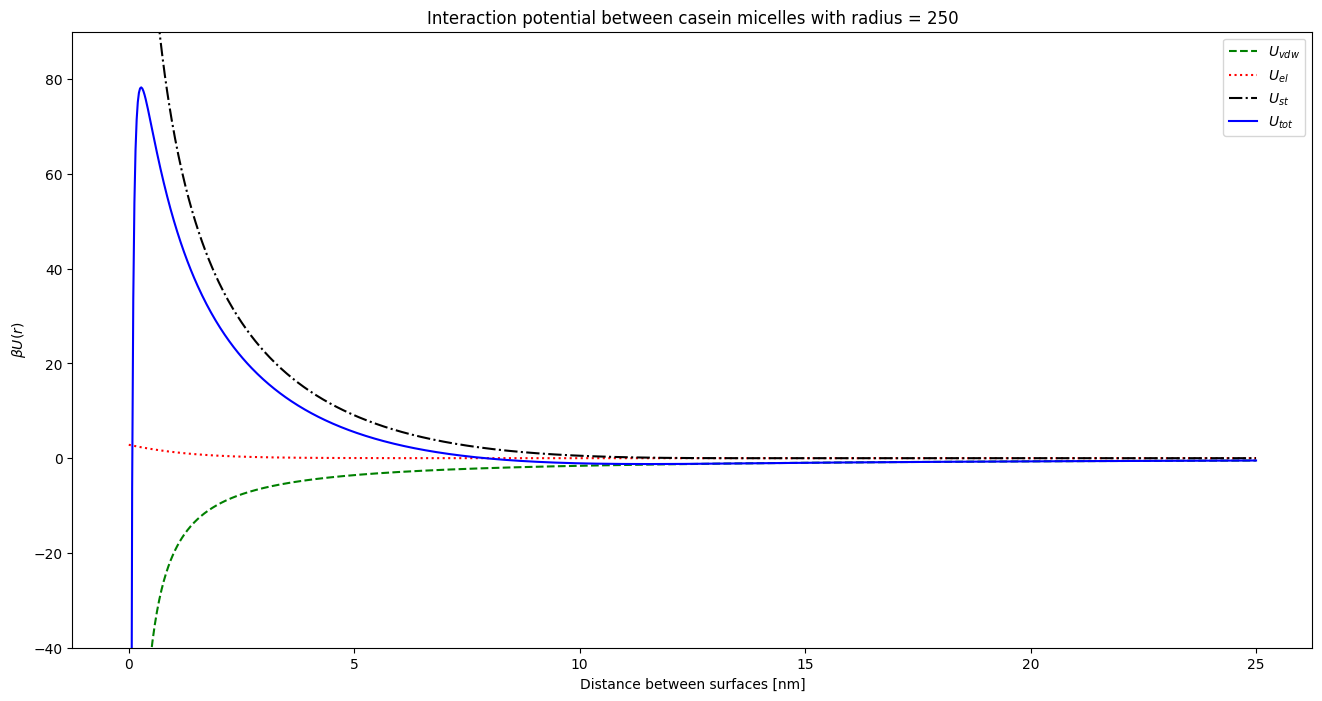

: 

In [16]:
dists = np.linspace(0.00001,25,1000)
vdws = []
ess = []
sters = []

fc.SIGMA = 0.006 #* (1-0.75)
#fc.EPS = 75

for i in dists:
  radius = 250
  dist_between = 2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  vdws.append(fc.vdw(tm1,tm2))
  ess.append(fc.elec_rep(tm1,tm2))
  #ess.append(fc.elec_repv2(tm1,tm2))
  #ess.append(fc.elec_rep3(tm1,tm2))
  sters.append(fc.steric(tm1,tm2))

#print(dists)
#print(vdws)
print(ess)
#print(sters)

total_fs = [v + e + s for (v,e,s) in zip(vdws,ess,sters)]


plt.figure(figsize=(16,8))

plt.plot(dists, vdws, c="green", label = "$U_{vdw}$", linestyle='--')
plt.plot(dists,ess,c="red",label="$U_{el}$",linestyle=":")
plt.plot(dists,sters,color = "black", label="$U_{st}$",linestyle="-.")
plt.plot(dists,total_fs,color = "blue", label="$U_{tot}$")

plt.ylim((-40,90))
plt.title(f"Interaction potential between casein micelles with radius = {radius}")
plt.xlabel("Distance between surfaces [nm]")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()

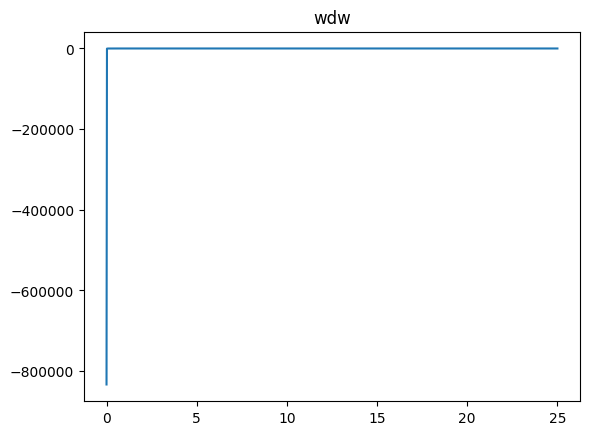

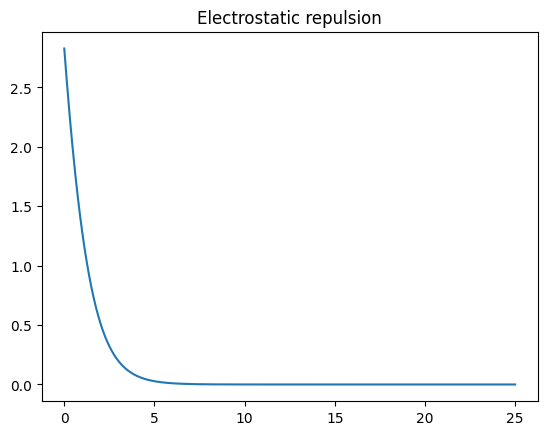

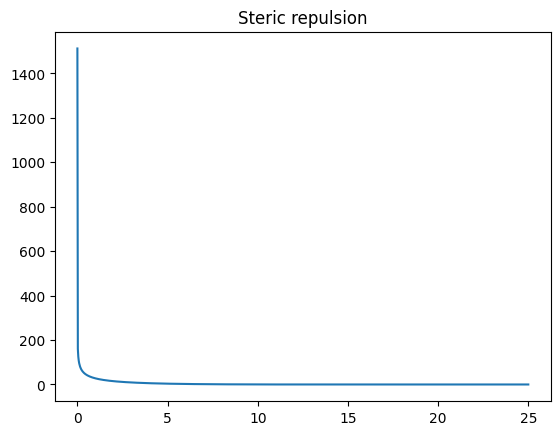

In [8]:
plt.plot(dists,vdws)
plt.title("wdw")
plt.show()
plt.plot(dists,ess)
plt.title("Electrostatic repulsion")
plt.show()
plt.plot(dists,sters)
plt.title("Steric repulsion")
plt.show()